In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Propriedades

L_SL = 0.223
#Umax = 0.04
#width = 0.63
#a = 0.25
#b = 0.25*10

## Condições Iniciais
L_CEOPT = 0.093
L_CE_norm = 0.087/L_CEOPT
Fmax = 3000
a=0
u=1
L_SL_norm = L_SL/L_CEOPT
dt = 0.001
t = np.arange(0,3,dt)
F_tendon_norm = np.empty_like(t)
F_kpe_norm = np.empty_like(t)
F_CE_norm = np.empty_like(t)
F_tot = np.empty_like(t)
fiber_length = np.empty_like(t)
tendon_length = np.empty_like(t)

## Functions

In [3]:
def computeTendonForce (L_SEE_norm,L_SL_norm):
    """
    ComputeTendonForce
    
    Inputs:
    
        L_SEE_norm - Normalized tendon length
    
        L_SL_norm - Normalized slack length of the tendon
    
        L_CEOPT = Optimal length of the fiber
        
    Output:
        F_tendon_norm - Normalized tendon force
    
    """
    Umax = 0.04
    
    if L_SEE_norm < L_SL_norm:
        F_tendon_norm[i] = 0
    else:
        F_tendon_norm =  ((L_SEE_norm - L_SL_norm)/(Umax*L_SL_norm))**2
        
    return F_tendon_norm

In [4]:
def computeParalelElementForce (L_CE_norm,L_SL_norm):
    """
    Compute Paralel Elemento Force
    
    Inputs:
    
        L_CE_norm - Normalized Contract Element length
    
        L_SL_norm - Normalized slack length of the tendom
    
        L_CEOPT = Optimal length of the fiber
        
    Output:
        F_kpe_norm - Normalized paralel element force
    
    """
    
    Umax = 0.04
    
    if L_CE_norm < 1:
        F_kpe_norm = 0
    else:
        F_kpe_norm = ((L_CE_norm - 1)/(Umax*L_SL_norm))**2
        
    return F_kpe_norm

In [5]:
def computeForceLengthCurve (L_CE_norm):
    """
    Compute Force Length Curve
    
    Inputs:
    
        L_CE_norm - Normalized Contract Element length
        
    Output:
        F_Lnorm - Normalized Force Length Element
    
    """
    width = 0.63
    
    F_Lnorm = max(0,(1-((L_CE_norm-1)/width)**2))
        
    return F_Lnorm

In [6]:
def computeActivation(a,u,dt):
    """
    Compute Activation
    
    Inputs:
    
    a - activation before interaction
    
    u- parameter representing brains comand
    
    dt- differential part of time
        
    Output:
    
    a- activation after interaction
    
    """
    tact=0.015
    tdeact=0.050
    if u>a:
        ta=tact*(0.5+1.5*a)
    if u<=a:
        ta=tdeact/(0.5+1.5*a)
    deltaa=dt*((u-a)/ta)
    a=a+dt*deltaa
    
    return a

In [7]:
def computeForceContract (F_tendon_norm,F_kpe_norm,):
    """"
    Incremental Contract Element's length
    
    Inputs:
    
        F_tendon_norm - Normalized tendon force
        
        F_CE_norm - Normalized Contract Element Force
        
    Output:
        F_kpe_norm - Normalized paralel element force
      
    """
    
    F_CE_norm = F_tendon_norm - F_kpe_norm
        
    return F_CE_norm

In [8]:
def dLCEdt (F_Lnorm, F_CE_norm,a):
    """"
    Incremental Contract Element's length
    
    Inputs:
        a -activation of the muscle
    
        F_Lnorm - Normalized Force Length Element
        
        F_kpe_norm - Normalized paralel element force
        
    Output:
        L_CE_dot - Incremental Contract Element's length
             
    """
    A = 0.25
    F_m_len = 1.4 #young
    #F_m_len = 1.8 #old
    v_max = 10 #young
    #v_max = 8 #old
    
    if F_CE_norm <= a*F_Lnorm:
        b = a*F_Lnorm + F_CE_norm/A
        
    else:
        b = (2 + 2/A)*(a*F_Lnorm*F_m_len - F_CE_norm)/(F_m_len - 1)
        
    L_CE_dot = (0.25 + 0.75*a)*v_max*(F_CE_norm - a*F_Lnorm)/b

    return L_CE_dot

In [9]:
for i in range(1,len(t)):
    
    if t[i] <= 1:
        L_m = 0.31
    if (t[i]>1 and t[i] < 2):
        L_m = 0.31 - 0.04 * (t[i] - 1)
    if t[i] <= 1:
        u = 0.5
    if (t[i]>1 and t[i] < 2):
        u = 1
    if t[i]>2:
        u = 0.5
        
        
    L_SEE_norm = L_m/L_CEOPT - L_CE_norm
    
    F_tendon_norm[i] = computeTendonForce(L_SEE_norm,L_SL_norm)
        
    F_kpe_norm[i] = computeParalelElementForce(L_CE_norm,L_SL_norm)
        
    F_Lnorm = computeForceLengthCurve(L_CE_norm)
    
    F_CE_norm[i] = computeForceContract(F_tendon_norm[i],F_kpe_norm[i])
    
    a = computeActivation(a,u,dt)
        
    L_CE_norm = L_CE_norm + dt*dLCEdt (F_Lnorm,F_CE_norm[i],a)
    
    F_tot[i] = F_tendon_norm[i]*Fmax
    fiber_length[i] = L_CE_norm*L_CEOPT
    tendon_length[i] = L_SEE_norm*L_CEOPT
    print(a)

6.666666666666668e-05
0.00013331111555466685
0.0001999333629475641
0.0002665334251093029
0.0003331113182842416
0.0003996670586971854
0.0004662006625534192
0.0005327121460387406
0.0005992015253194925
0.0006656688165425957
0.0007321140358355816
0.000798537199306625
0.0008649383230445759
0.0009313174231189926
0.0009976745155801737
0.00106400961645919
0.0011303227417679175
0.0011966139074990692
0.0012628831296262264
0.001329130424103872
0.0013953558068674212
0.0014615592938332542
0.0015277409008987476
0.001593900643942306
0.0016600385388233939
0.001726154601382567
0.0017922488474415039
0.001858321292803038
0.0019243719532511874
0.001990400844551188
0.0020564079824495233
0.002122393382673957
0.002188357060933562
0.002254299032918754
0.0023202193143013203
0.002386117920734452
0.002451994867852774
0.0025178501712723764
0.002583683846590845
0.002649495909387292
0.002715286375222387
0.0027810552596383856
0.0028468025781591623
0.00291252834629024
0.0029782325795188196
0.0030439152933138106
0.003

0.054726067153488434
0.05477706437851669
0.05482804906262792
0.054879021212200174
0.05492998083360622
0.05498092793321353
0.0550318625173843
0.05508278459247544
0.055133694164838584
0.05518459124082012
0.055235475826761166
0.05528634792899759
0.055337207553860006
0.05538805470767381
0.05543888939675913
0.0554897116274309
0.05554052140599882
0.05559131873876736
0.05564210363203579
0.055692876092098186
0.05574363612524341
0.055794383737755145
0.055845118935911875
0.05589584172598691
0.0559465521142484
0.0559972501069593
0.056047935710377424
0.056098608930755425
0.056149269774340795
0.0561999182473759
0.05625055435609795
0.056301178106739035
0.056351789505526106
0.05640238855868101
0.056452975272420464
0.056503549652956085
0.05655411170649439
0.05660466143923678
0.05665519885737959
0.05670572396711405
0.056756236774626316
0.056806737286097475
0.05685722550770354
0.056907701445615466
0.056958165105999145
0.05700861649501543
0.05705905561882012
0.05710948248356397
0.057159897095392716
0.057

0.14415589894581662
0.14423556046073885
0.14431520127400135
0.14439482139788637
0.1444744208446641
0.1445539996265928
0.14463355775591866
0.14471309524487594
0.14479261210568695
0.14487210835056202
0.1449515839916996
0.14503103904128622
0.1451104735114965
0.1451898874144932
0.14526928076242726
0.1453486535674377
0.14542800584165178
0.14550733759718493
0.14558664884614075
0.14566593960061114
0.14574520987267614
0.14582445967440413
0.14590368901785172
0.14598289791506383
0.14606208637807364
0.1461412544189027
0.14622040204956083
0.1462995292820463
0.14637863612834562
0.14645772260043377
0.14653678871027412
0.1466158344698184
0.14669485989100683
0.14677386498576803
0.1468528497660191
0.1469318142436656
0.14701075843060163
0.14708968233870973
0.147168585979861
0.14724746936591504
0.14732633250872007
0.14740517542011283
0.14748399811191865
0.14756280059595145
0.1476415828840138
0.14772034498789688
0.1477990869193805
0.14787780869023318
0.14795651031221202
0.1480351917970629
0.14811385315652

0.17712235776707433
0.17715047013350058
0.17717857850421992
0.17720668288024027
0.1772347832625691
0.17726287965221352
0.17729097205018018
0.17731906045747536
0.17734714487510497
0.17737522530407446
0.1774033017453889
0.177431374200053
0.177459442669071
0.17748750715344674
0.17751556765418375
0.17754362417228506
0.17757167670875335
0.17759972526459086
0.17762776984079948
0.17765581043838066
0.17768384705833548
0.17771187970166458
0.17773990836936823
0.17776793306244631
0.17779595378189827
0.1778239705287232
0.17785198330391977
0.17787999210848623
0.17790799694342047
0.17793599780971994
0.17796399470838176
0.17799198764040255
0.17801997660677865
0.17804796160850592
0.17807594264657986
0.17810391972199555
0.17813189283574768
0.17815986198883058
0.17818782718223813
0.17821578841696384
0.17824374569400084
0.1782716990143418
0.1782996483789791
0.17832759378890464
0.17835553524510997
0.1783834727485862
0.1784114063003241
0.178439335901314
0.17846726155254589
0.1784951832550093
0.178523101009

Text(0,0.5,'Force [N]')

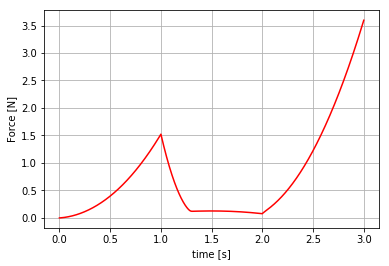

In [10]:
plt.plot(t,F_tendon_norm, c = 'red')
plt.grid()
plt.xlabel ('time [s]')
plt.ylabel ('Force [N]')

Text(0,0.5,'Force [N]')

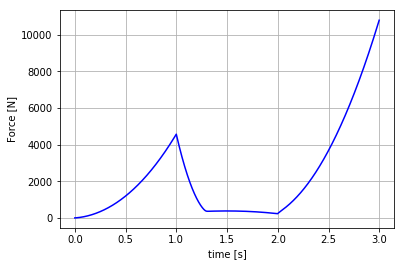

In [11]:
plt.plot(t,F_tot, c = 'blue')
plt.grid()
plt.xlabel ('time [s]')
plt.ylabel ('Force [N]')

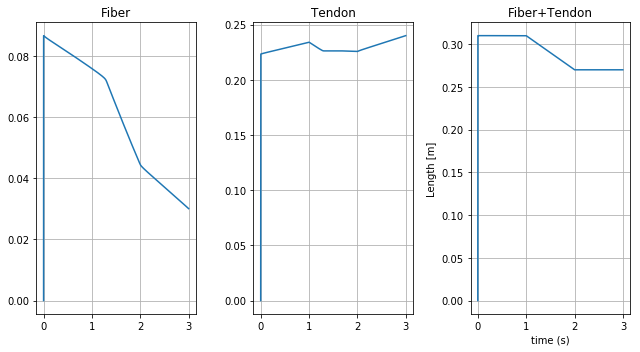

In [12]:
fig,  ax  =  plt.subplots(1, 3, figsize=(9, 5), sharex=True)

ax[0].plot(t, fiber_length, label = 'Fiber')
ax[0].set_title('Fiber')
ax[0].grid()
ax[1].plot(t, tendon_length, label = 'Tendon')
ax[1].set_title('Tendon')
ax[1].grid()
ax[2].plot(t, fiber_length+tendon_length, label = 'Fiber+Tendon')
ax[2].set_title('Fiber+Tendon')
ax[2].grid()
plt.xlabel('time (s)')
plt.ylabel('Length [m]')
plt.tight_layout()
